<h1> <span style='color:blue'>Student Name:</span> <b>SHRUTHAKEERTHY.S</b></h1>
<h2><span style='color:blue'>Batch Number: </span><b>Batch-1 Machine Learning (August-September)</b></h2>
<h2><span style='color:blue'>Major Project Batch: </span><b>ML081B3</b></h2>
<h2><span style='color:blue'>Team Members : </span></h2><b> Surajram.S,Shruthakeerthy S,Athul 17'M2101,MBNSV Bharath,Puli Charisma,Rhythm Das,D B Delphy Supreetha,PrettyDeori,Leisha Dias,Brinnel Dsouza,Melanie Dsouza,Jeherul Islam,Tejas pabbu,Manash Pratim Pathak_ETE_5th Sem,Deekshith reddy,Nipon TALUKDAR</b>
<h2><span style='color:blue'>College     : </span><b>Sri Venkateswara College of Engineering,Sriperumbudur</b></h2>  
<h3><span style='color:blue'>Email ID    : </span><b>shruthas9@gmail.com</b></h3>

<h1><u><span style='color:#DC143C'>Performing Classification to Predict the Coronary Heart Disease on Framingham Dataset</u></span></h1>

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing

#SVM
from sklearn.svm import SVC
#Normalization
from sklearn.preprocessing import StandardScaler
#Training and testing data split
from sklearn.model_selection import train_test_split 
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Accuracy Measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Random Forest
from sklearn.ensemble import RandomForestClassifier

<b>Reading Data</b>

In [2]:
data = pd.read_csv("framingham.csv")
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.columns


Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<b>The attributes are</b>


1) sex: male(0) or female(1);(Nominal)

2) age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

3) currentSmoker: whether or not the patient is a current smoker (Nominal)

4) cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

5) BPMeds: whether or not the patient was on blood pressure medication (Nominal)

6) prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

7) prevalentHyp: whether or not the patient was hypertensive (Nominal)

8) diabetes: whether or not the patient had diabetes (Nominal)

9) totChol: total cholesterol level (Continuous)

10) sysBP: systolic blood pressure (Continuous)

11) diaBP: diastolic blood pressure (Continuous)

12) BMI: Body Mass Index (Continuous)

13) heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

14) glucose: glucose level (Continuous)

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) - Target Variable

Objective: Build a classification model that predicts heart disease in a subject. (note the target column to predict is 'TenYearCHD' where CHD = Coronary heart disease) 

In [5]:
data.dtypes

Gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [6]:
data.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data.shape

(4240, 16)

In [8]:
#Checking Null Values
data.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
#Checking Duplicates
duplicate_data = data[data.duplicated()]
duplicate_data

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


<h2><u> <span style='color:blue'>Exploratory Data Analysis </span></u></h2>

<h3>UNIVARIATE ANALYSIS</h3>

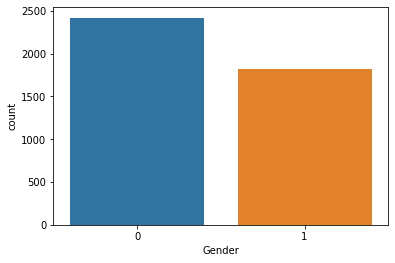

In [10]:
# male and female countplot
sns.countplot(x=data['Gender'])
#0-Male
#1-Female

<p>From the above count plot we can observer that male are more in number than female</p>

0    4131
1     109
Name: diabetes, dtype: int64

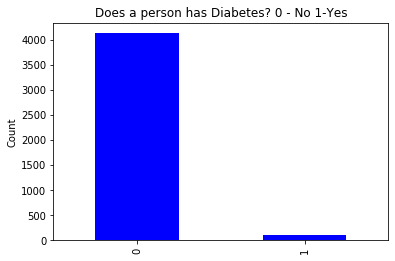

In [11]:
data.diabetes.value_counts().plot(kind="bar",color='blue')
plt.title("Does a person has Diabetes? 0 - No 1-Yes")
plt.ylabel("Count")
data.diabetes.value_counts()

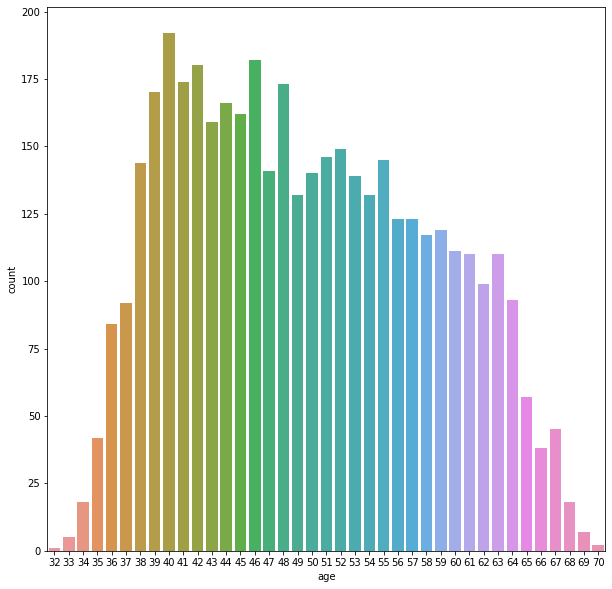

In [12]:
# age countplot
fig = plt.figure(figsize = (10,10))
sns.countplot(x=data['age'])


<p> From the graph we can observe that pepole in age 40 are higher</p>

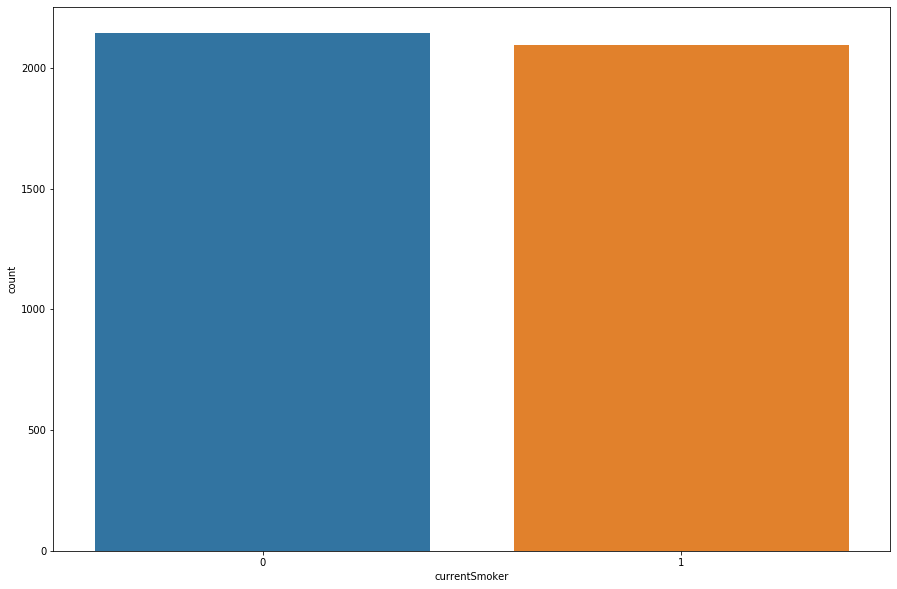

In [13]:
#  countplot for  current smoker
fig = plt.figure(figsize = (15,10))
sns.countplot(x=data['currentSmoker'])
#0 means not a smoker
#1 means a smoker


<p>From the above count plot we can see that number of  current non smokers are slightly more than the number of smokers </p>

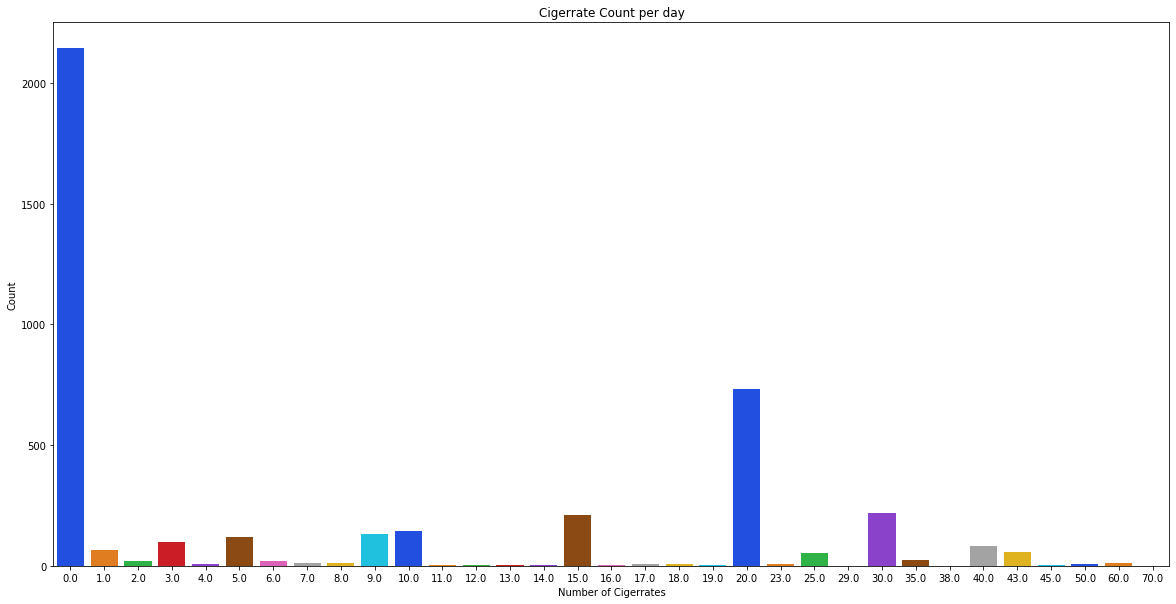

In [14]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['cigsPerDay'],palette='bright')
plt.xlabel("Number of Cigerrates")
plt.ylabel("Count")
plt.title("Cigerrate Count per day")
data.cigsPerDay.value_counts()
plt.show()

0    4215
1      25
Name: prevalentStroke, dtype: int64

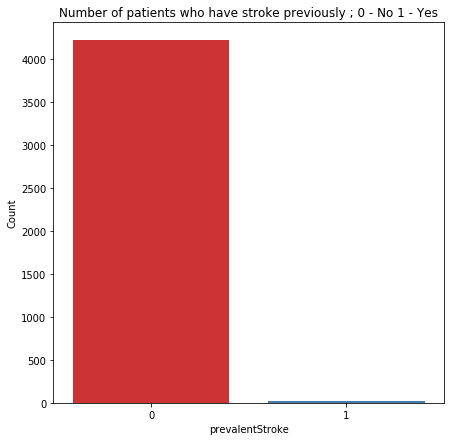

In [15]:
plt.rcParams["figure.figsize"] =7,7
sns.countplot(x=data["prevalentStroke"],palette="Set1")
plt.ylabel("Count")
plt.title("Number of patients who have stroke previously ; 0 - No 1 - Yes")
data.prevalentStroke.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

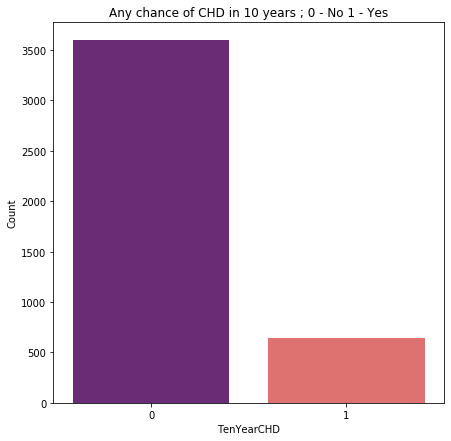

In [16]:
plt.rcParams["figure.figsize"] = 7,7
sns.countplot(x=data["TenYearCHD"],palette="magma")
plt.ylabel("Count")
plt.title("Any chance of CHD in 10 years ; 0 - No 1 - Yes")
data.TenYearCHD.value_counts()

<h3>BIVARIATE ANALYSIS<h3>

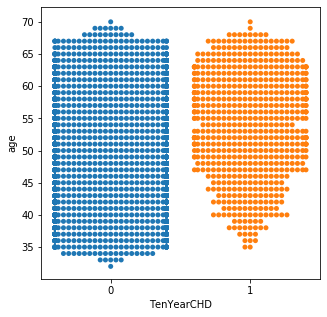

In [17]:
# age vs TenYearCHD
plt.figure(figsize=(5,5))
sns.swarmplot(x='TenYearCHD', y='age', data=data)

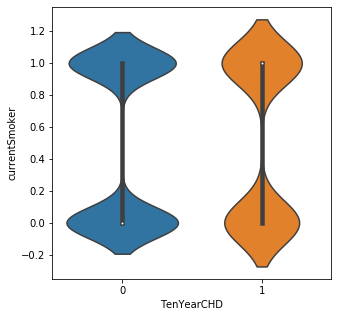

In [18]:
#TenYearCHD vs CurrentSmoker
plt.figure(figsize=(5,5))
sns.violinplot(x='TenYearCHD', y='currentSmoker', data=data)

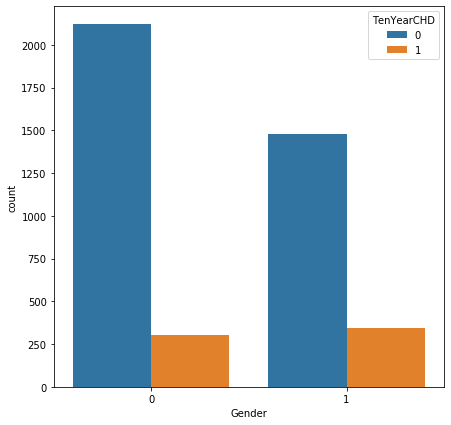

In [19]:
# male and female having disease or not
sns.countplot(x=data['Gender'], hue=data['TenYearCHD'])

<p>From the above graph we can see that women have higher possibility of getting affected</p>

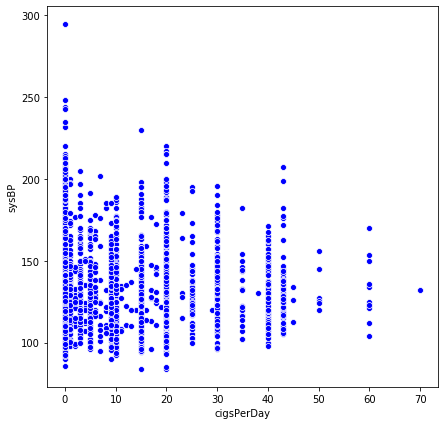

In [20]:
sns.scatterplot(x="cigsPerDay",y="sysBP",data=data,color='b',legend='full')

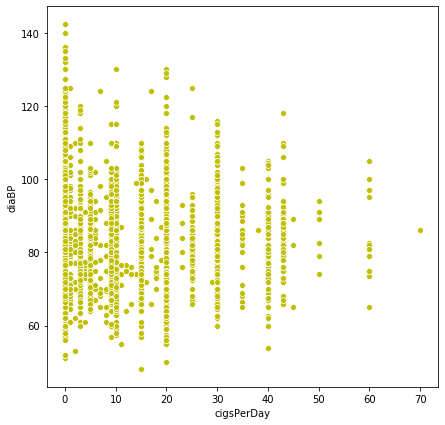

In [21]:
sns.scatterplot(x="cigsPerDay",y="diaBP",data=data,color='y',legend='full')

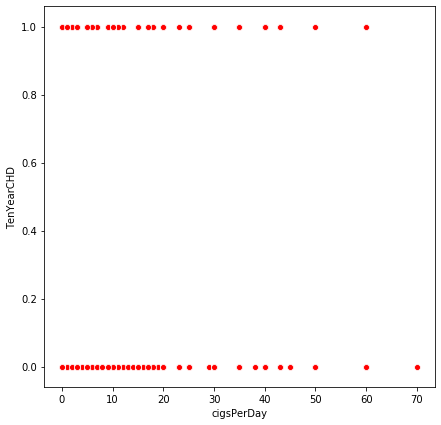

In [22]:
sns.scatterplot(x="cigsPerDay",y="TenYearCHD",data=data,color='r',legend='full')

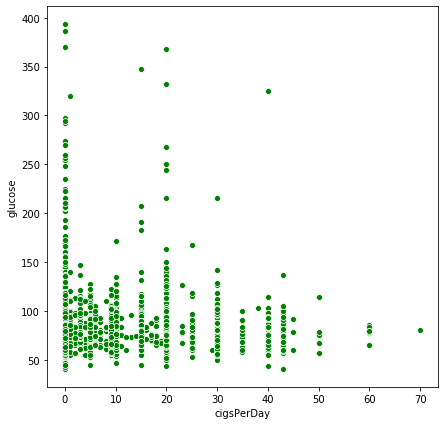

In [23]:
sns.scatterplot(x="cigsPerDay",y="glucose",data=data,color='g',legend='full')

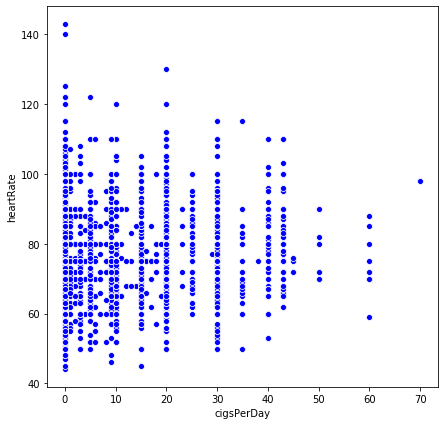

In [24]:
sns.scatterplot(x="cigsPerDay",y="heartRate",data=data,color='b',legend='full')

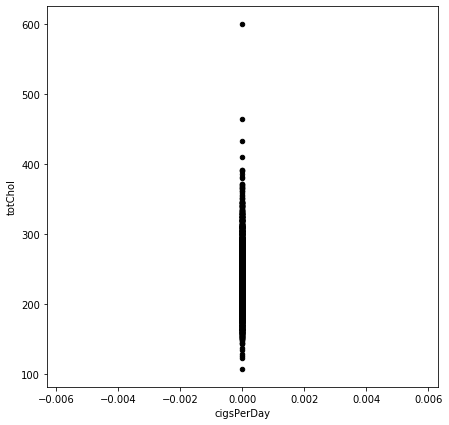

In [25]:
data[data['currentSmoker']==0].plot.scatter(x="cigsPerDay",y="totChol",color='k')

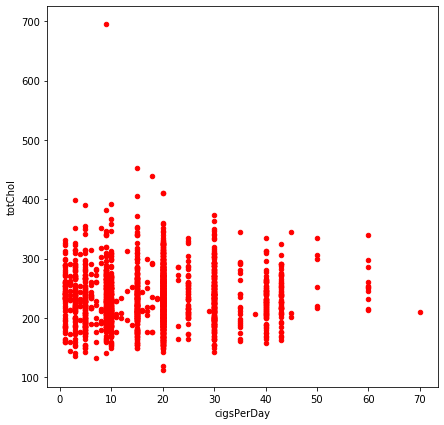

In [26]:
data[data['currentSmoker']==1].plot.scatter(x="cigsPerDay",y="totChol",color='r')

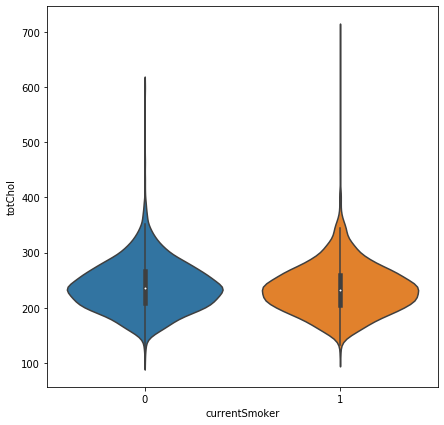

In [27]:
sns.violinplot(x='currentSmoker',y='totChol',data=data)

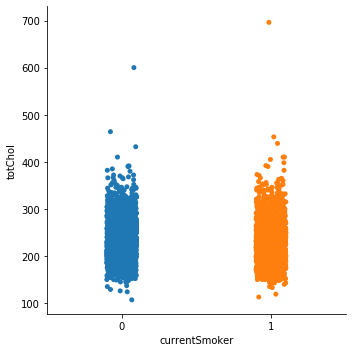

In [28]:
sns.catplot(x="currentSmoker",y="totChol",data=data)

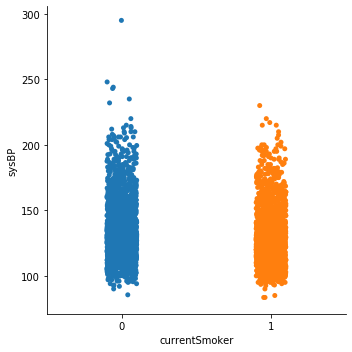

In [29]:
sns.catplot(x="currentSmoker",y="sysBP",data=data)

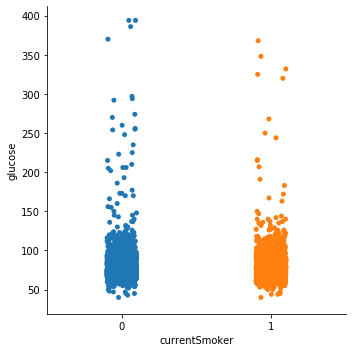

In [30]:
sns.catplot(x="currentSmoker",y="glucose",data=data)

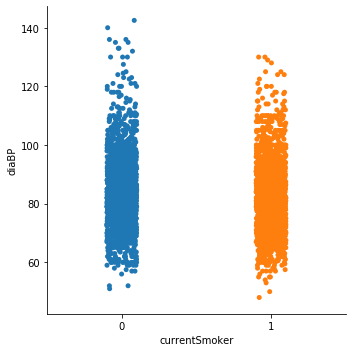

In [31]:
sns.catplot(x="currentSmoker",y="diaBP",data=data)

# OBSERVATIONS:
-By plotting graphs wrt to number of cigarettes per day and how it affects the health issues we are not able to find any relevence.

* In  Total Cholestrol(totChol) section , many non smokers lie between 100 to 400 chol while smokers lie between the same 100 to 400 when they smoke 10 to 70 cigarettes per day. This implies that tot chol is not dependent on the number of cigarettes entirely. it depends on how the person maintains his fat consumption and his exercise. In the nonsmoker case we have one person having a total chol at 600 and a smoker having chol at 700. This can state that they are obese.

* Those who are smokers and non smokers have similar heart rate but people who smoke more than 50 cigs a day have a decrease in their heart rate. The non smokers have a perfectly healthy heartrate.

* In the sysBP section we can see that a non smoker group has sysBP till 250while a smoker has comparitively lesser amount. We a know that smoking causes acute increase of BP and sometimes low bp too. we can say here for the fact that smokers have comparitively lower amount of BP than non smokers. Same can be said for diaBP too.

* The glucose amount in non smokers are alot. when it comes to smokers their glucose amount is limitted to 150 which is normal. Certain non smokers have glucose level upto 400 stating they are having sugar problems.


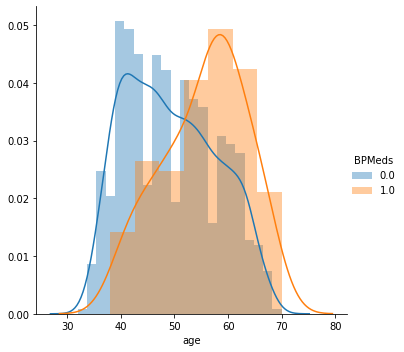

In [32]:
sns.FacetGrid(data,hue = "BPMeds",height = 5).map(sns.distplot,"age").add_legend()

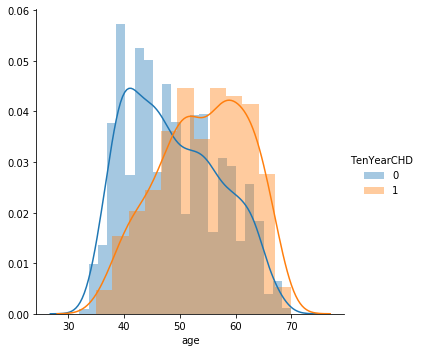

In [33]:
sns.FacetGrid(data,hue = "TenYearCHD",height = 5).map(sns.distplot,"age").add_legend()

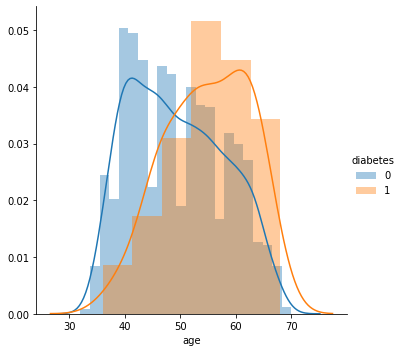

In [34]:
sns.FacetGrid(data,hue = "diabetes",height = 5).map(sns.distplot,"age").add_legend()

<h3>MULTIVARIATE ANALYSIS</h3>

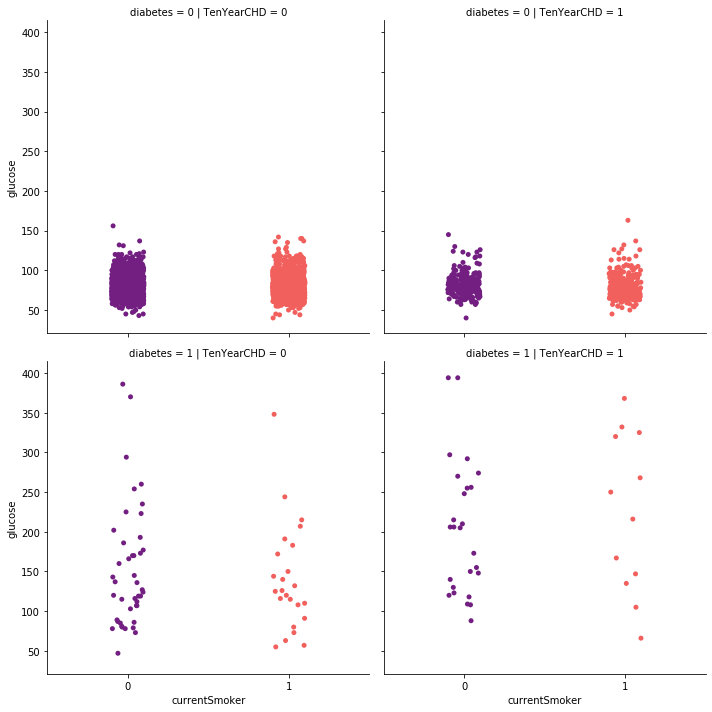

In [35]:

sns.catplot(y="glucose",x="currentSmoker",data=data,col="TenYearCHD",row='diabetes',palette="magma")

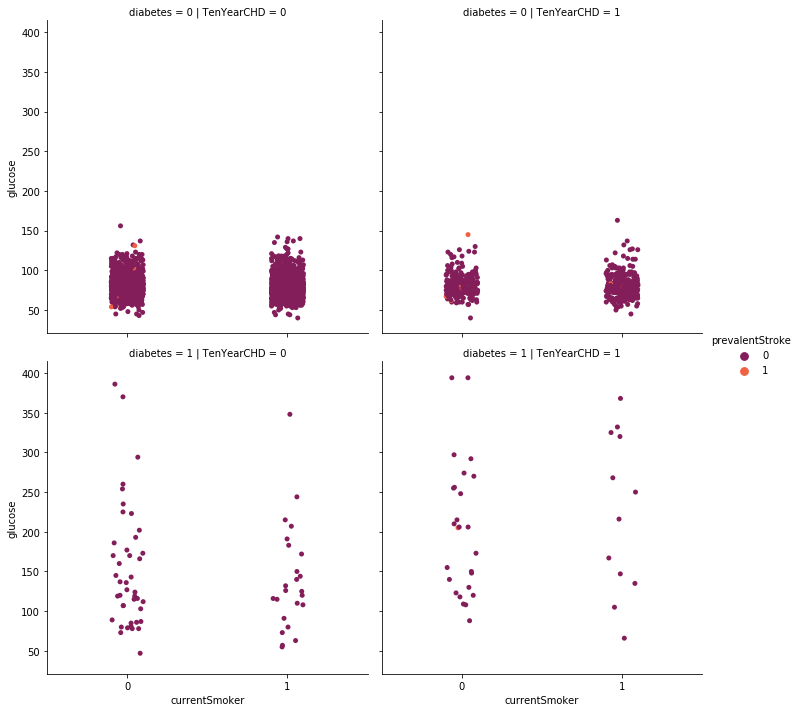

In [36]:
sns.catplot(y="glucose",x="currentSmoker",data=data,col="TenYearCHD",row='diabetes',hue='prevalentStroke',palette="rocket")

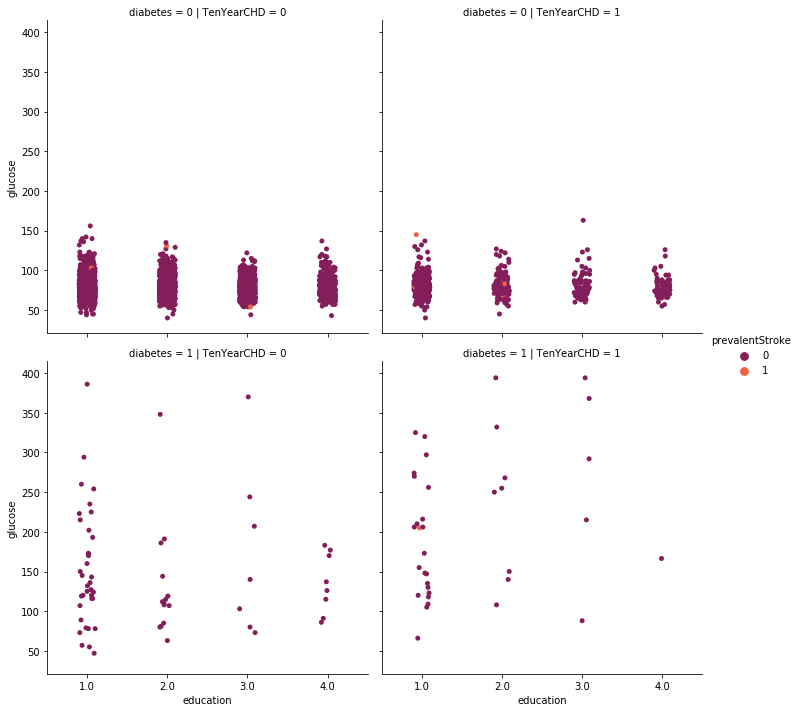

In [37]:
sns.catplot(y="glucose",x="education",data=data,col="TenYearCHD",row='diabetes',hue='prevalentStroke',palette="rocket")

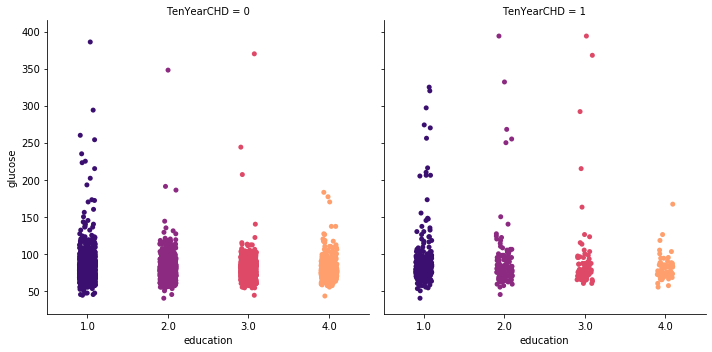

In [38]:
sns.catplot(y="glucose",x="education",data=data,col="TenYearCHD",palette="magma")

# Inferences:
* Patients who have diabetes have the risk of CHD mostly between the age of 35 to 50 and those who donot have the risk most in the age limit of 55 years. Those who have diabetes have a slight higher risk in these age limits.
* Patients who take BP meds mostly are at the risk in the age between 55 to 65 years and those who donot have the danger in the in the age between 40 to 50 years.
* Male patients have CHD mostly in the age between 35 to 55 whereas female patients have CHD in the age  between 45 to 65 years. And female patients have less frequency then the other in these ages.
* The glucose level of a non-smoker and smoker has no diabetes and has no risk for CHD is seen between 50-100 and the same for person who is a smoker and non-smoker who has no diabetes and has a risk of CHD is seen between 75-125

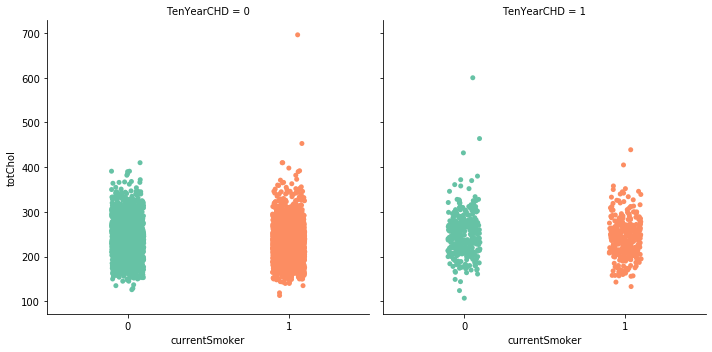

In [39]:
sns.catplot(y="totChol",x="currentSmoker",data=data,col="TenYearCHD",palette="Set2")

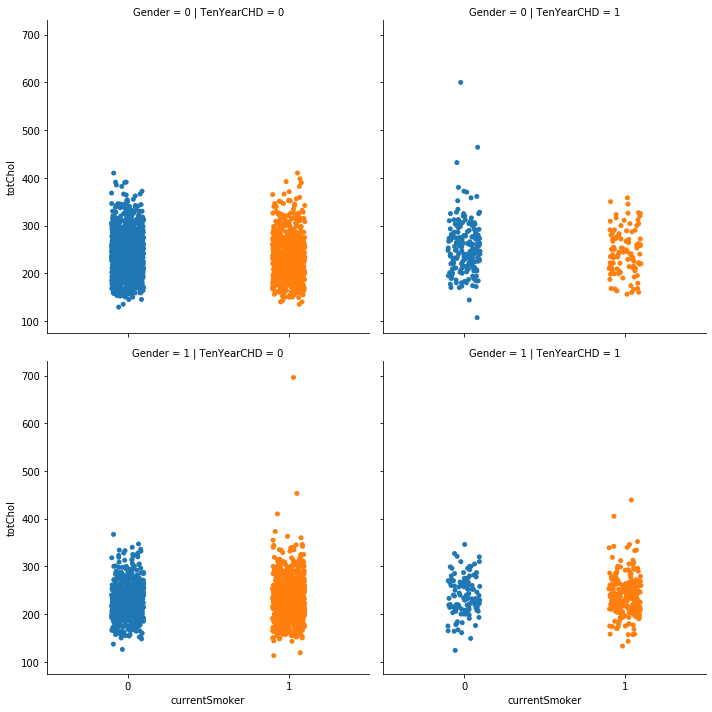

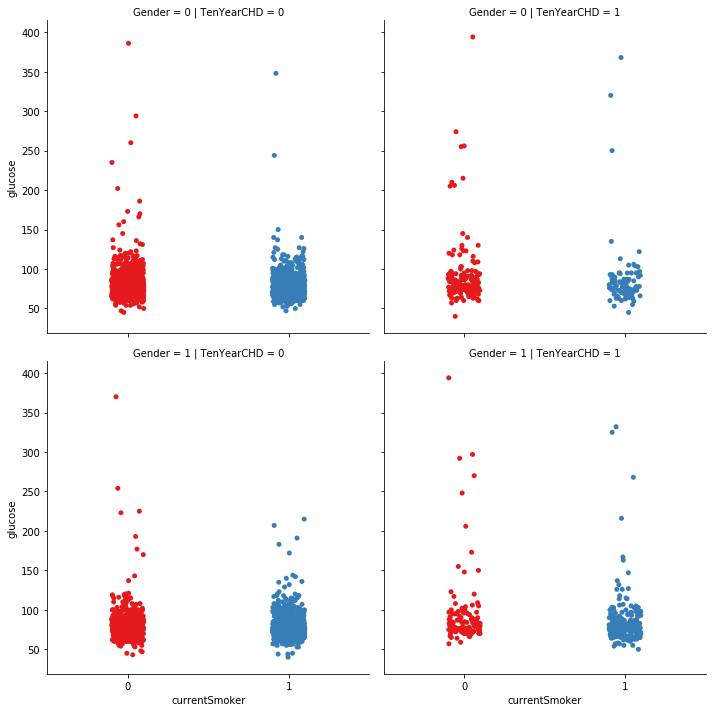

In [40]:
sns.catplot(y="totChol",x="currentSmoker",data=data,col="TenYearCHD",row='Gender')
sns.catplot(y="glucose",x="currentSmoker",data=data,col="TenYearCHD",row='Gender',palette="Set1")

# Inferences:
* The cholestrol level seems to be high if he/she is a smoker and if he has no risk of TenYearCHD
* The risk of TenyearCHD is less if the patient is non smoker and male and they have a cholestrol level between 150 - 350 and glucose level between 50 - 125.
* The risk of CHD is more if the patient is non smoker and male and they have a cholestrol level between 150 - 300 and glucode level between 50 - 100.

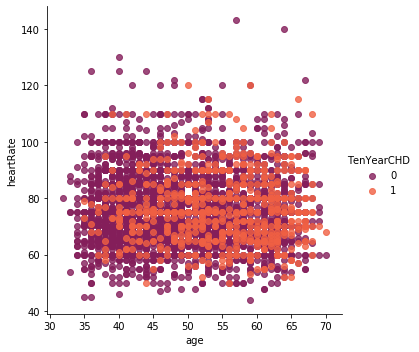

In [41]:
sns.lmplot("age","heartRate",data,hue="TenYearCHD",fit_reg=False,palette="rocket")

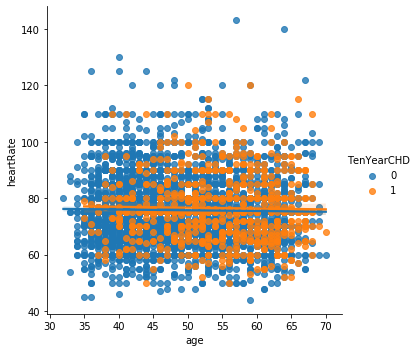

In [42]:
sns.lmplot("age","heartRate",data,hue="TenYearCHD",fit_reg=True)

# Inference:
* People with Higher healthy heart rates have lower chances to have heart disease.
* People who are above the age 50 have high risks of having heart disease

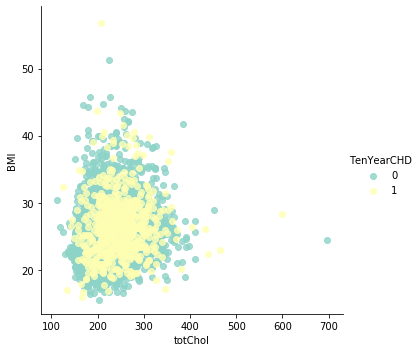

In [43]:
sns.lmplot("totChol","BMI",data,hue="TenYearCHD",fit_reg=False,palette="Set3")

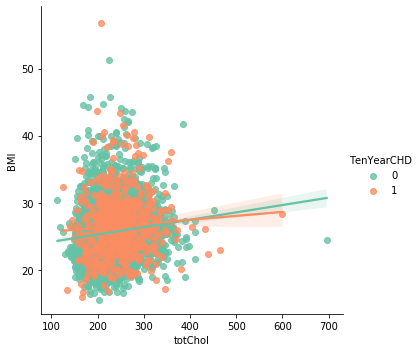

In [44]:
sns.lmplot("totChol","BMI",data,hue="TenYearCHD",fit_reg=True,palette="Set2")

 # INFERENCE
* From the above graph, we can observe that male Current smokers are higher and Cigarettes consumed per day by them is also comparitively high. So, the risk factor for male to get heart disease is high.

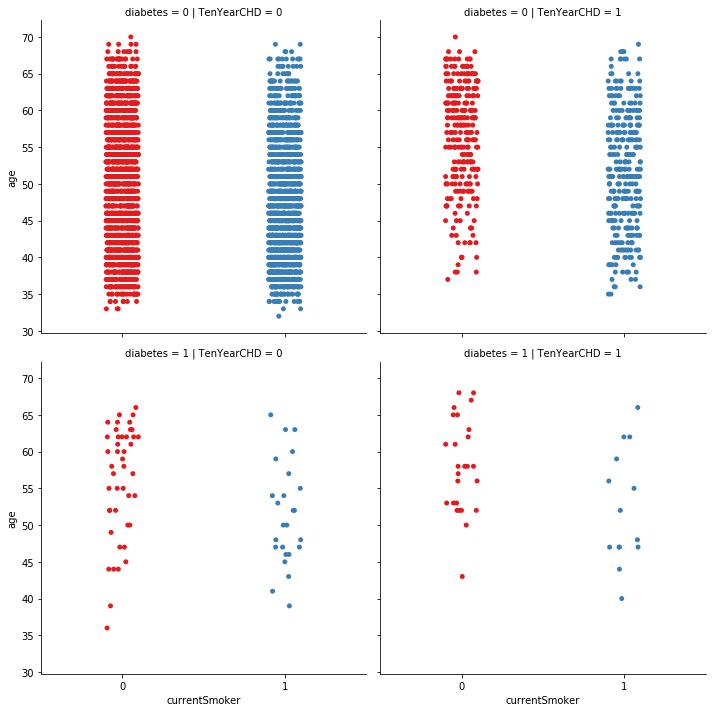

In [45]:
sns.catplot(y="age",x="currentSmoker",data=data,col="TenYearCHD",row='diabetes',palette="Set1")

# INFERENCES
* People with no CHD as non-smokers, no diabetis and those who have the risk of CHD are usually smokers non-diabetic and range widely from the age 35 - 70. The other sections of people are less and scattered all around the age range.

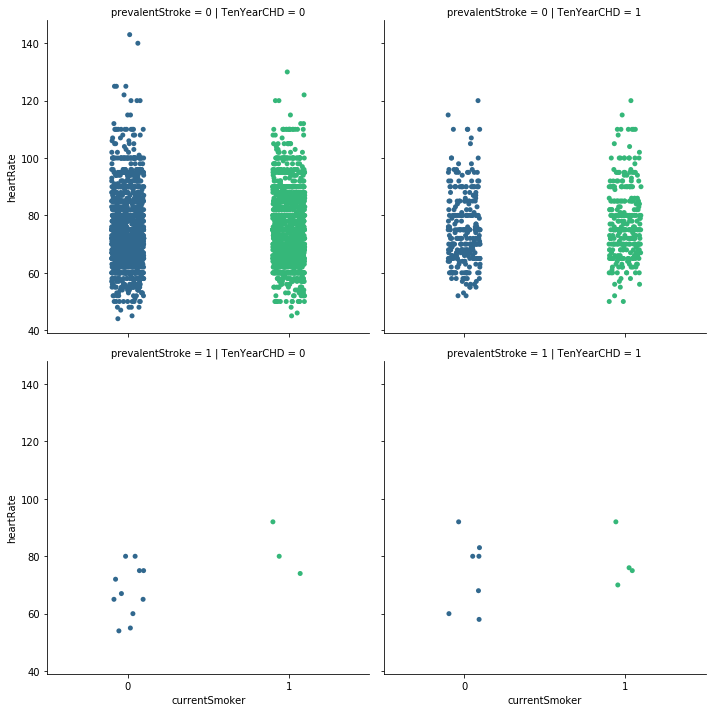

In [46]:
sns.catplot(y="heartRate",x="currentSmoker",data=data,col="TenYearCHD",row='prevalentStroke',palette="viridis")

Number of people with CHD and with higher Heart Rate
 0    85
1    20
Name: TenYearCHD, dtype: int64


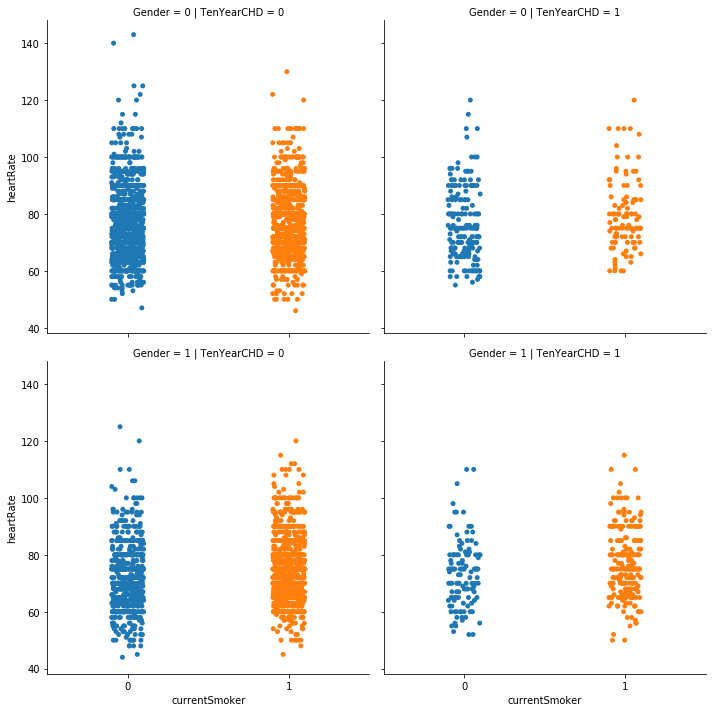

In [47]:
sns.catplot(y="heartRate",x="currentSmoker",data=data,col="TenYearCHD",row='Gender')
print("Number of people with CHD and with higher Heart Rate\n",data[data['heartRate']>100]['TenYearCHD'].value_counts())

# Inferences :
* The patients with a HR of 40-100 and smokers/non-smokers also no prelevant stroke have less chance of CHD.
* With a HR of 50-100 the risk of CHD is less.Smokers and females greater at risk who have a wide range of HR.
* Non-smokers, non-diabetic who have less chance of CHD have a BMI of 20-35.

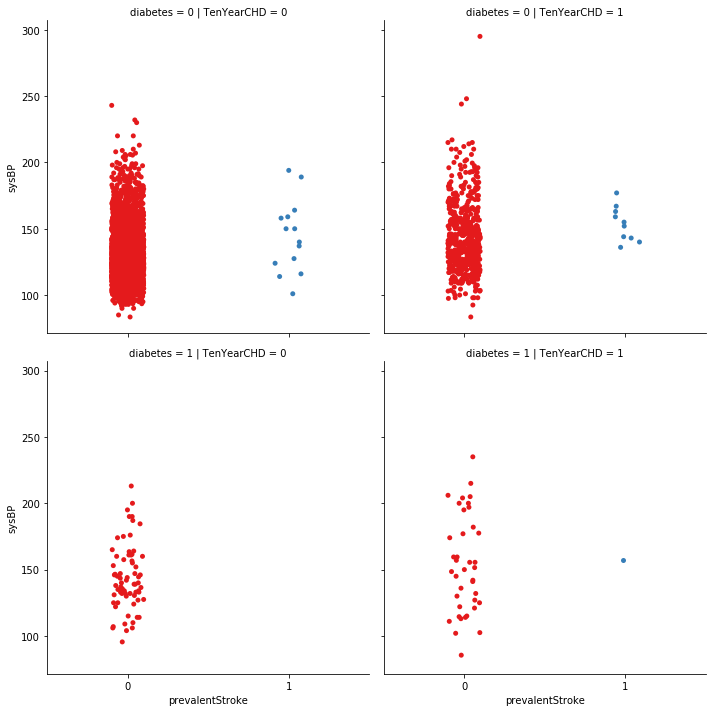

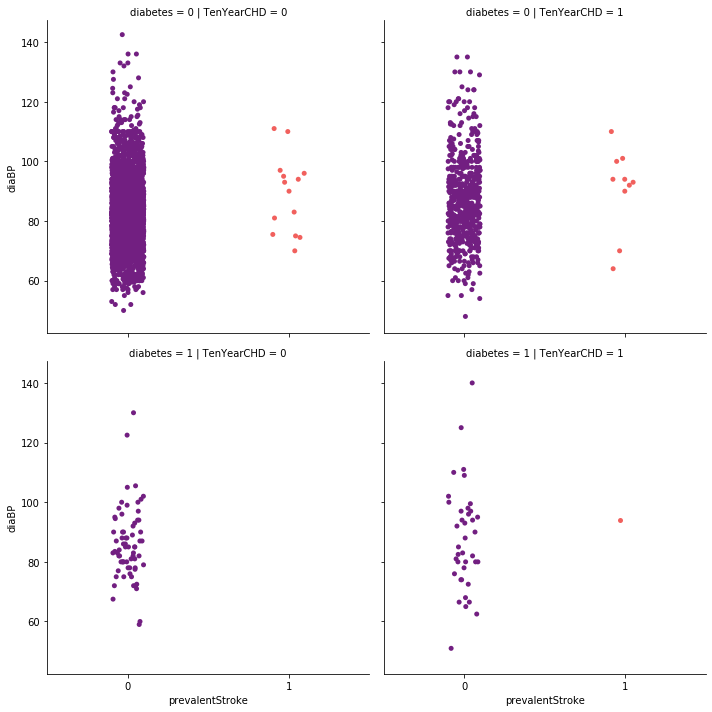

In [48]:
sns.catplot(y="sysBP",x="prevalentStroke",data=data,col="TenYearCHD",row='diabetes',palette="Set1")
sns.catplot(y="diaBP",x="prevalentStroke",data=data,col="TenYearCHD",row='diabetes',palette="magma")

# Conclusions:
* Even though it seems heart disease is more frequent in people with lower level of education, it is not the complete fact. Number of sample in other levels is smaller. So, we need to another way to compare the relation. As a matter of fact it has not much to do with CHD.
* Women are slightly more proned to have heart dieseases with other health conditions than men although women are less in count have not having CHD then men as well. This slight indifference can be ignored.
* Even though we think smokers are in big risk of CHD, data analysis says the difference is not that big. By looking at rate, we can see that percantage difference is only around 1%. Hence, smoking is not a very helpful attribute to detect CHD but cigsPerDay can be helpful attribute to detect CHD.
* People on BP medicine are more likely to have CHD in future than people who are not on medication of BP
* Diabetic patients are more in risk than non-diabetic patients.
* The data shows that people without CHD and with CHD are closer to being overweight in average. But without CHD people are close to normal BMI rate, which indicates BMI is a good indicator of health and CHD.
* People with higher sysBP level are more likely to develop 10year CHD.
* People with higher diaBP level are more likely to develop 10year CHD.
* People with higher Cholesterol level are more likely to develop 10year CHD.
* The final conclusion is that male or female, better in education or not better in education, who comsume more cigsPerday , who are on BP medicine,have high cholestrol,high sysBP and diaBP, and higher BMI have higher risk of CHD within the 10 yrs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A3B32E508>,
      dtype=object)

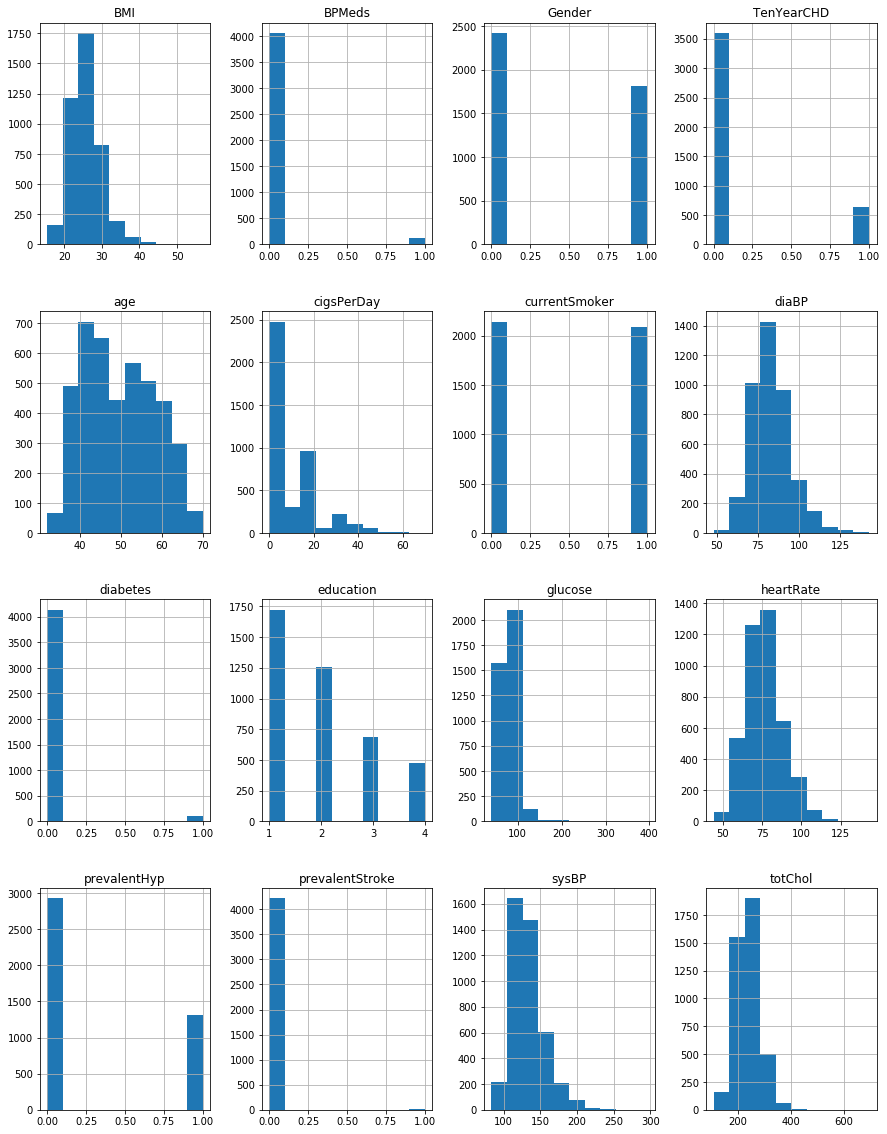

In [49]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

<Figure size 1440x1080 with 0 Axes>

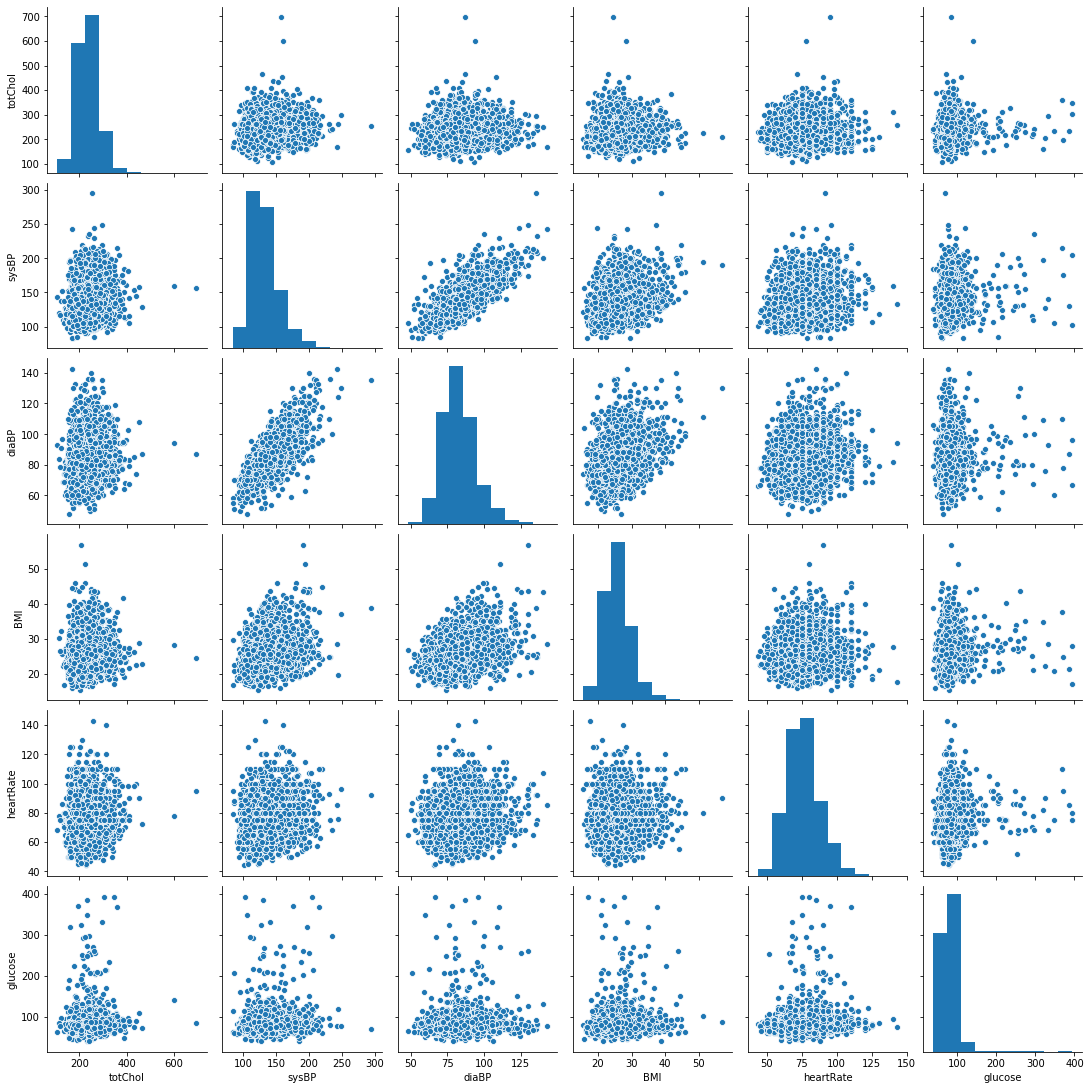

In [50]:
# To understand correlation between some features, pairplot is used
plt.figure(figsize=(20,15))
sns.pairplot(data.loc[:,'totChol': 'glucose'])

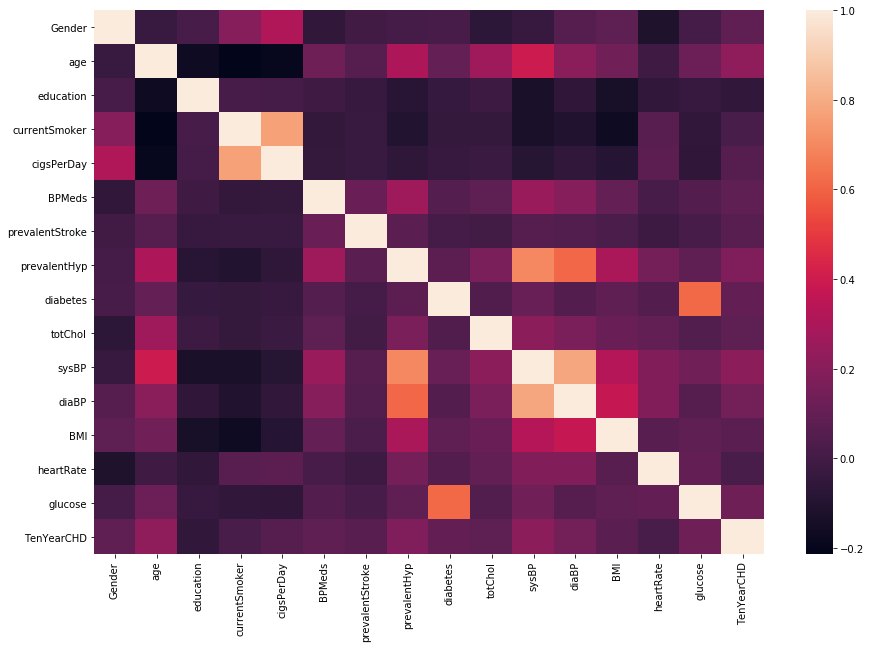

In [51]:
# checking which features are correlated with each other and are correlated with the outcome variable
fig = plt.figure(figsize = (15,10))
correlation = data.corr()
sns.heatmap(correlation)

From the above <b>heat map</b> we identify that <b>education column does not have any relation with the prediction of Heart Disease</b>

In [52]:
# Dropping columns education
data = data.drop(['education'], axis=1)
data.head()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [53]:
# Checking for more missing data 
data.isna().sum()

Gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<b>Below we  use imputation methord by replacing NULL values with most frequently used data</b>

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [55]:
data1 = pd.DataFrame(imputer.fit_transform(data))
data1.columns = data.columns
data1.index = data.index

In [56]:
data1.isnull().sum()

Gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<p>All the NULL values have been removed</p>

<h2><span style='color:blue'>Identify the features with the most importance for the outcome variable 10 year CHD</span></h2>


In [57]:


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = data1.iloc[:,0:14]  #independent columns
y = data1.iloc[:,-1]    #target column i.e 10 year CHG

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

              Specs       Score
9             sysBP  727.935535
13          glucose  406.022386
1               age  319.266019
8           totChol  235.859795
3        cigsPerDay  231.669558
10            diaBP  152.748563
6      prevalentHyp   92.048736
7          diabetes   39.144944
4            BPMeds   30.759595
0            Gender   18.899930
5   prevalentStroke   16.109887


<b>Now arranging in decending order of the scores</b>

In [58]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores


,Specs,Score
9,sysBP,727.935535
13,glucose,406.022386
1,age,319.266019
8,totChol,235.859795
3,cigsPerDay,231.669558
10,diaBP,152.748563
6,prevalentHyp,92.048736
7,diabetes,39.144944
4,BPMeds,30.759595
0,Gender,18.899930


<b>The graph below gives the important features contributing to heart disease along with their scores</b>

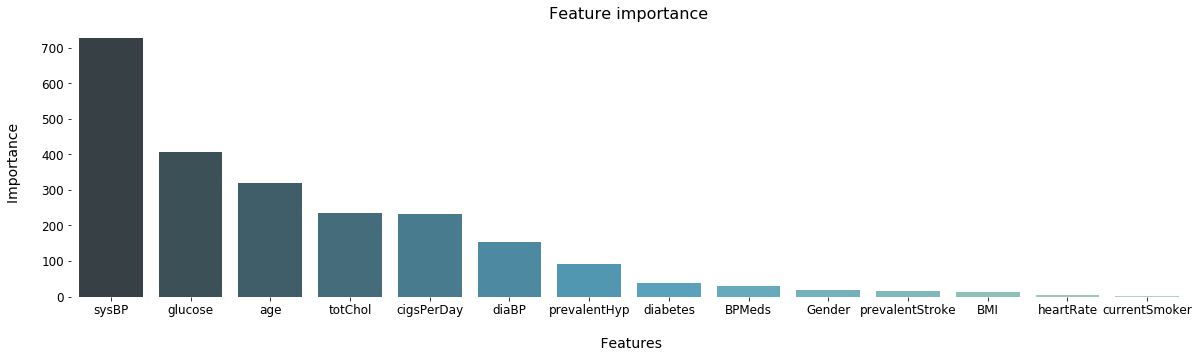

In [59]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<b> Selecting the 10 most impactful features for the target variable</b>

In [60]:
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'Gender']

<b>Create new dataframe with selected features </b>


In [61]:

data2= data1[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','Gender','TenYearCHD']]
data2.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
0,106.0,77.0,39.0,195.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0
1,121.0,76.0,46.0,250.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0
2,127.5,70.0,48.0,245.0,20.0,80.0,0.0,0.0,0.0,1.0,0.0
3,150.0,103.0,61.0,225.0,30.0,95.0,1.0,0.0,0.0,0.0,1.0
4,130.0,85.0,46.0,285.0,23.0,84.0,0.0,0.0,0.0,0.0,0.0


<b>Checking correlation again</b>

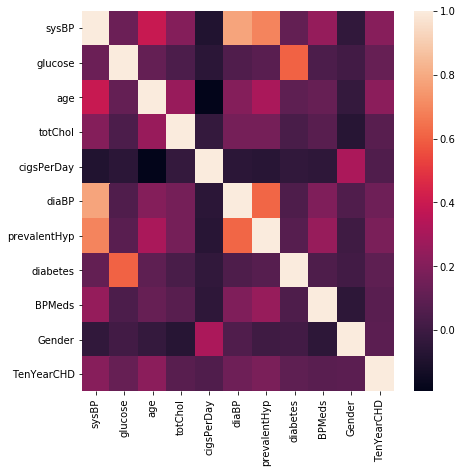

In [62]:

data_corr = data2.corr()
sns.heatmap(data_corr)

<b>Checking for outliers</b>

In [63]:

data2.describe()


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,132.354599,81.326415,49.580189,236.738443,8.944340,82.897759,0.310613,0.025708,0.029245,0.429245,0.151887
std,22.033300,22.919885,8.572942,44.328954,11.904777,11.910394,0.462799,0.158280,0.168513,0.495027,0.358953
min,83.500000,40.000000,32.000000,107.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,72.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,77.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,85.000000,56.000000,262.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,696.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


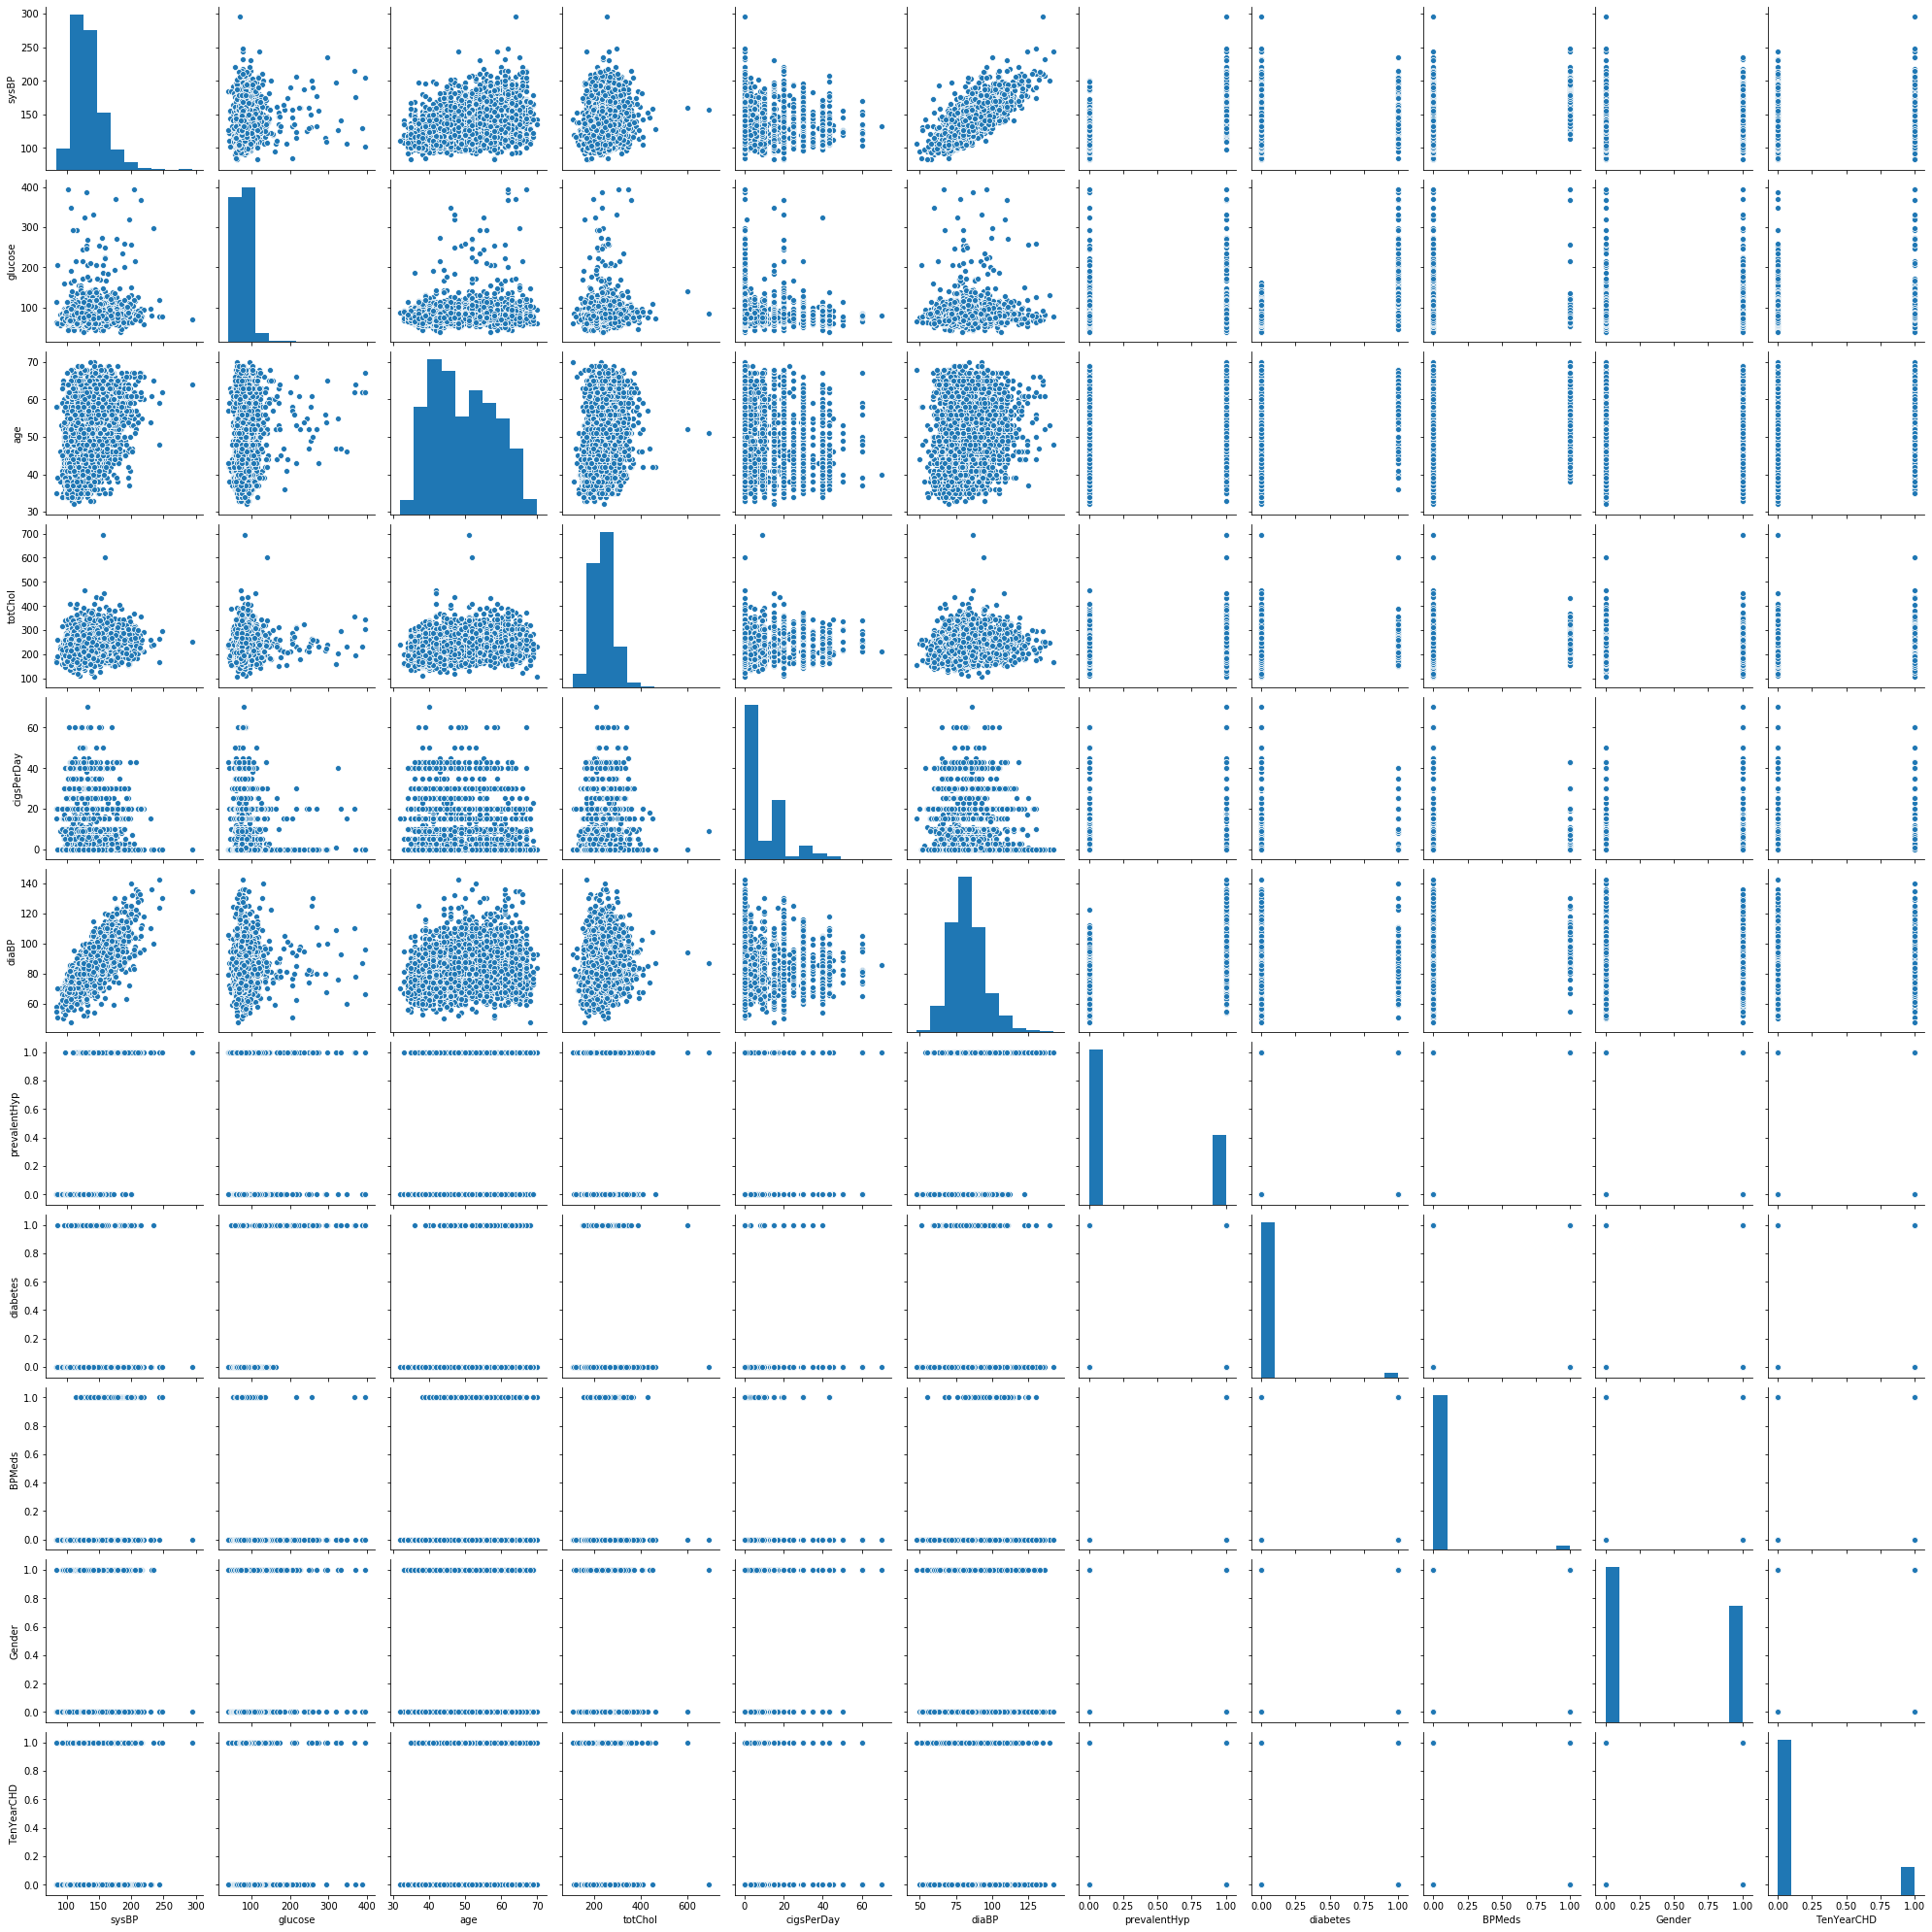

In [64]:
sns.pairplot(data2)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
1111,159.5,140.0,52.0,600.0,0.0,94.0,1.0,1.0,0.0,0.0,1.0
3160,157.0,84.0,51.0,696.0,9.0,87.0,1.0,0.0,0.0,1.0,0.0


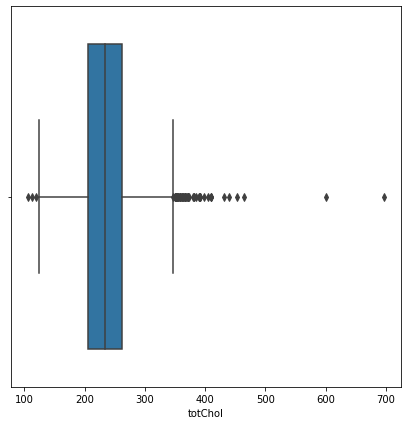

In [65]:
# Zooming into cholesterol in outliers

sns.boxplot(data2.totChol)
outliers = data2[(data2['totChol'] > 500)] 
outliers

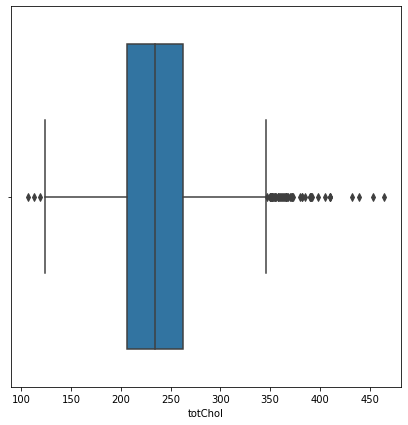

In [66]:
# Dropping 2 outliers in cholesterin
data2 = data2.drop(data2[data2.totChol > 599].index)
sns.boxplot(data2.totChol)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
37,160.0,225.0,52.0,178.0,0.0,98.0,1.0,1.0,0.0,1.0,0.0
44,206.0,215.0,53.0,311.0,0.0,92.0,1.0,1.0,1.0,0.0,1.0
66,190.0,202.0,62.0,212.0,0.0,99.0,1.0,1.0,0.0,0.0,0.0
763,157.0,205.0,58.0,267.0,0.0,94.0,1.0,1.0,0.0,0.0,1.0
952,114.5,216.0,66.0,234.0,30.0,62.5,0.0,1.0,0.0,1.0,1.0
1268,160.0,223.0,61.0,218.0,0.0,96.0,0.0,1.0,0.0,1.0,0.0
1363,127.0,325.0,55.0,205.0,40.0,76.0,0.0,1.0,0.0,1.0,1.0
1485,132.0,268.0,52.0,258.0,20.0,80.0,0.0,1.0,0.0,1.0,1.0
1649,155.5,274.0,43.0,231.0,0.0,99.5,1.0,1.0,0.0,0.0,1.0
1674,115.0,292.0,56.0,214.0,0.0,80.0,0.0,1.0,0.0,1.0,1.0


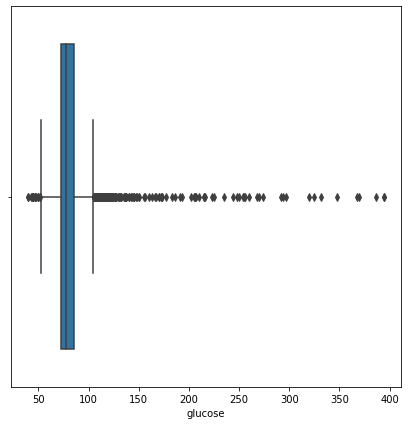

In [67]:
#Zooming into glucose outliers
sns.boxplot(data2.glucose)
outliers1 = data2[(data2['glucose'] > 200)] 
outliers1


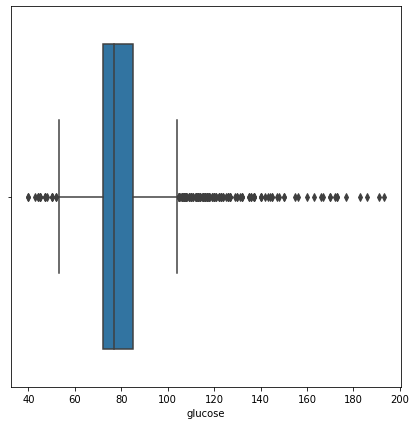

In [68]:
#Droping the outliers
data2 = data2.drop(data2[data2.glucose > 200].index)
sns.boxplot(data2.glucose)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
481,295.0,70.0,64.0,253.0,0.0,135.0,1.0,0.0,0.0,0.0,1.0
864,244.0,120.0,59.0,264.0,0.0,124.0,1.0,0.0,1.0,0.0,1.0
1189,243.0,77.0,48.0,169.0,0.0,142.5,1.0,0.0,0.0,0.0,0.0
1989,232.0,79.0,61.0,238.0,0.0,136.0,1.0,0.0,0.0,1.0,0.0
3489,248.0,77.0,62.0,298.0,0.0,130.0,1.0,0.0,1.0,0.0,1.0
3616,230.0,97.0,54.0,262.0,15.0,110.0,1.0,0.0,0.0,0.0,0.0


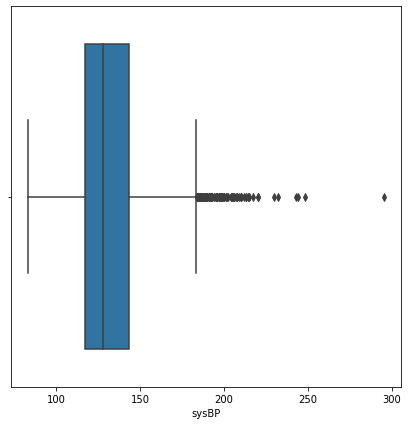

In [69]:
#Zooming into sysbp outliers
sns.boxplot(data2.sysBP)
outliers2 = data2[(data2['sysBP'] > 220)] 
outliers2


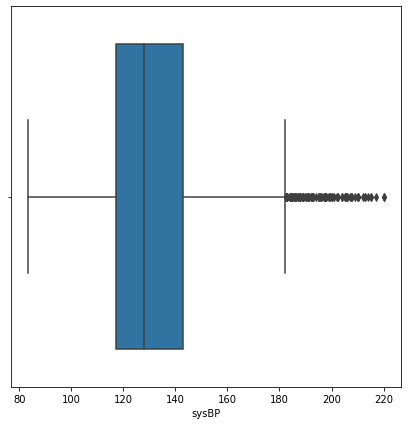

In [70]:
#Removing sysbp outliers
data2 = data2.drop(data2[data2.sysBP > 220].index)
sns.boxplot(data2.sysBP)


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
833,200.0,130.0,53.0,248.0,0.0,140.0,1.0,1.0,0.0,0.0,1.0
2608,208.0,82.0,52.0,252.0,0.0,136.0,1.0,0.0,0.0,0.0,0.0


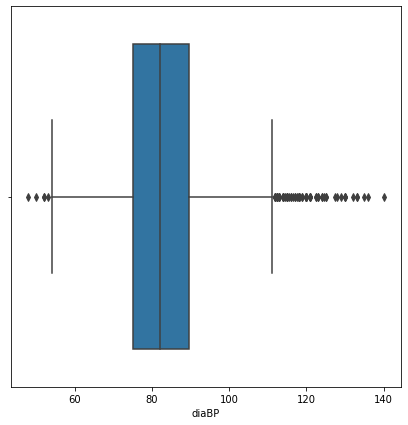

In [71]:
#Zooming into diaBP outliers
sns.boxplot(data2.diaBP)
outliers3 = data2[(data2['diaBP'] > 135)] 
outliers3


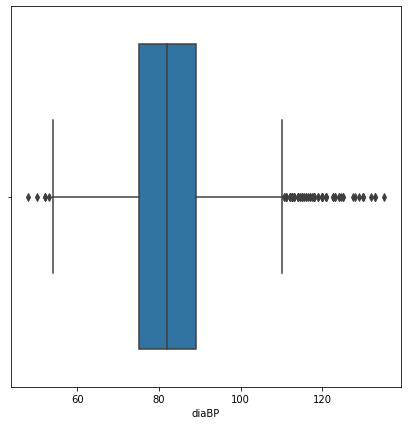

In [72]:
#Removing diaBP outliers
data2 = data2.drop(data2[data2.diaBP > 135].index)
sns.boxplot(data2.diaBP)

<b>Obtaining clean data after removing outliers</b>

In [73]:
data2_clean = data2

In [74]:
data2_clean

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
0,106.0,77.0,39.0,195.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0
1,121.0,76.0,46.0,250.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0
2,127.5,70.0,48.0,245.0,20.0,80.0,0.0,0.0,0.0,1.0,0.0
3,150.0,103.0,61.0,225.0,30.0,95.0,1.0,0.0,0.0,0.0,1.0
4,130.0,85.0,46.0,285.0,23.0,84.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4235,131.0,86.0,48.0,248.0,20.0,72.0,0.0,0.0,0.0,0.0,0.0
4236,126.5,75.0,44.0,210.0,15.0,87.0,0.0,0.0,0.0,0.0,0.0
4237,133.5,107.0,52.0,269.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0
4238,141.0,72.0,40.0,185.0,0.0,98.0,1.0,0.0,0.0,1.0,0.0


<b>Feature scaling</b>

In [75]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
data2scaled = pd.DataFrame(scaler.fit_transform(data2_clean), columns=data2_clean.columns)
data2scaled.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
count,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000,4196.000000
mean,0.355119,0.259762,0.461016,0.362473,0.128282,0.399601,0.306959,0.017398,0.028122,0.429457,0.147283
std,0.156010,0.092714,0.225611,0.121559,0.170274,0.134035,0.461287,0.130763,0.165341,0.495058,0.354430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245421,0.209150,0.263158,0.277311,0.000000,0.310345,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.326007,0.241830,0.447368,0.355742,0.000000,0.390805,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.435897,0.294118,0.631579,0.434174,0.285714,0.472701,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>Train test split</b>

In [76]:
y = data2scaled['TenYearCHD']
X = data2scaled.drop(['TenYearCHD'], axis = 1)

# divide train test:  60% - 40 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=29)
print(len(X_train))
print(len(X_test))

2517
1679


<b>Checking balance of outcome variable</b>

Class 0: 3578
Class 1: 618
Proportion: 5.79 : 1


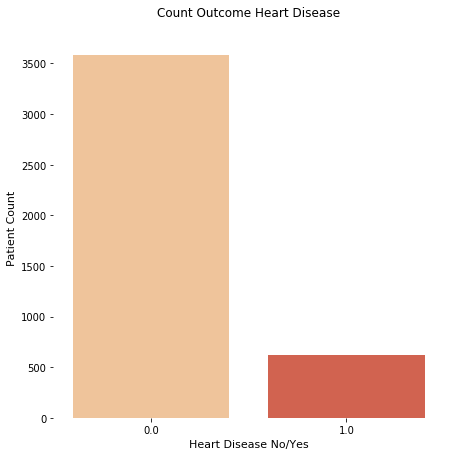

In [77]:

target_count = data2scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(data2scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

<p>We can see that the proportion is 5.79:1 which is not well balanced. One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.</p>

<p>Oversampling aims to increase the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.</p>



0.0    3578
1.0    3578
Name: TenYearCHD, dtype: int64


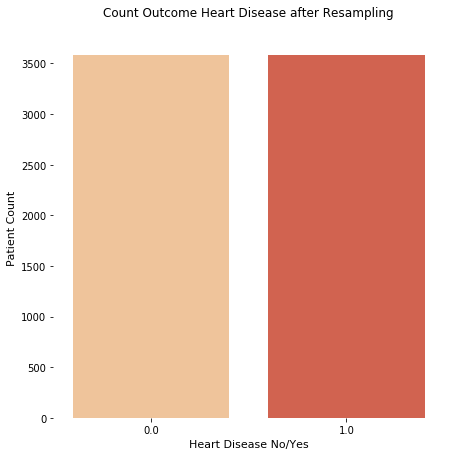

In [78]:

shuffled_data2 = data2scaled.sample(frac=1,random_state=4)

CHD_data2 = shuffled_data2.loc[shuffled_data2['TenYearCHD'] == 1].sample(n=3578,random_state=42,replace=True)


non_CHD_data2 = shuffled_data2.loc[shuffled_data2['TenYearCHD'] == 0]

# Concatenate both dataframes again
normalized_data2 = pd.concat([CHD_data2, non_CHD_data2])

# check new class counts
print(normalized_data2.TenYearCHD.value_counts())

# plot new count
sns.countplot(normalized_data2.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
plt.show()

<b>Again train test split with balanced data</b>

In [79]:
y1 = normalized_data2['TenYearCHD']
X1 = normalized_data2.drop(['TenYearCHD'], axis = 1)

# divide train test: 60 % - 40 %
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4, random_state=29)
print(len(X1_train))
print(len(X1_test))


4293
2863


<h3><span style='color:blue'>MODELING AND  EVALUATION</span></h3>

<b>1.LOGISTIC REGRESSION</b>

In [80]:

normalized_data2_reg = LogisticRegression().fit(X1_train, y1_train)

normalized_data2_reg_pred = normalized_data2_reg.predict(X1_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acclog = accuracy_score(y1_test, normalized_data2_reg_pred)
print(f"The accuracy score for LogReg is: {round(acclog,3)*100}%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1log = f1_score(y1_test, normalized_data2_reg_pred)
print(f"The f1 score for LogReg is: {round(f1log,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionlog = precision_score(y1_test, normalized_data2_reg_pred)
recalllog = recall_score(y1_test, normalized_data2_reg_pred)
print(f"The recall score for LogReg is: {round(recalllog,3)*100}%")
print(f"The precision score for LogReg is: {round(precisionlog,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True 

The accuracy score for LogReg is: 67.80000000000001%
The f1 score for LogReg is: 68.10000000000001%
The recall score for LogReg is: 68.0%
The precision score for LogReg is: 68.2%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

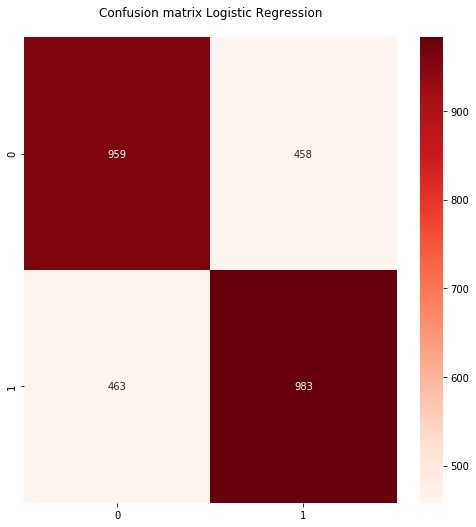

In [81]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y1_test, normalized_data2_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

<b>2.SVM</b>

In [82]:

svm = SVC()

#fit model
svm.fit(X1_train, y1_train)

normalized_data2_svm_pred = svm.predict(X1_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
accsvm = accuracy_score(y1_test, normalized_data2_svm_pred)
print(f"The accuracy score for SVM is: {round(accsvm,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1svm = f1_score(y1_test, normalized_data2_svm_pred)
print(f"The f1 score for SVM is: {round(f1svm,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionsvm = precision_score(y1_test, normalized_data2_svm_pred)
print(f"The precision score for SVM is: {round(precisionsvm,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recallsvm = recall_score(y1_test, normalized_data2_svm_pred)
print(f"The recall score for SVM is: {round(recallsvm,3)*100}%")

The accuracy score for SVM is: 68.7%
The f1 score for SVM is: 69.1%
The precision score for SVM is: 68.8%
The recall score for SVM is: 69.5%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

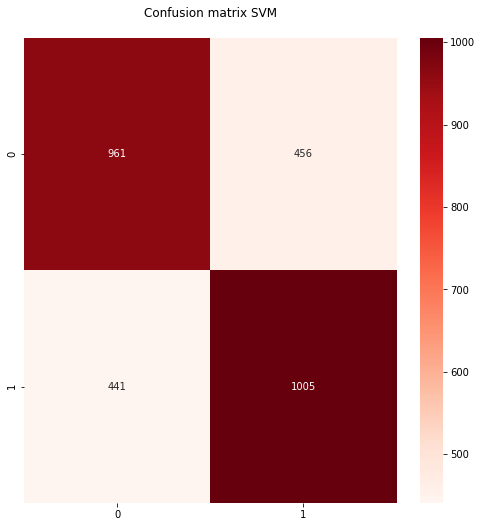

In [83]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y1_test, normalized_data2_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

<b>3.DECISION TREE CLASSIFICATION</b>

In [84]:

dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X1_train, y1_train)

normalized_data2_dtc_pred = dtc_up.predict(X1_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
accdec = accuracy_score(y1_test, normalized_data2_dtc_pred)
print(f"The accuracy score for DTC is: {round(accdec,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1dec= f1_score(y1_test, normalized_data2_dtc_pred)
print(f"The f1 score for DTC is: {round(f1dec,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisiondec = precision_score(y1_test, normalized_data2_dtc_pred)
print(f"The precision score for DTC is: {round(precisiondec,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recalldec = recall_score(y1_test, normalized_data2_dtc_pred)
print(f"The recall score for DTC is: {round(recalldec,3)*100}%")

The accuracy score for DTC is: 90.3%
The f1 score for DTC is: 91.10000000000001%
The precision score for DTC is: 84.39999999999999%
The recall score for DTC is: 99.0%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

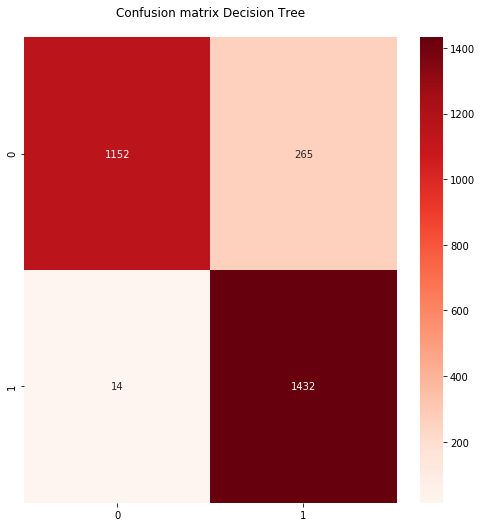

In [85]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y1_test, normalized_data2_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

<b>4.KNN</b>

<b>We  now plot a graph with value of k in x axis and accuracy score in y axis to identify the correct number of neighbours</b>

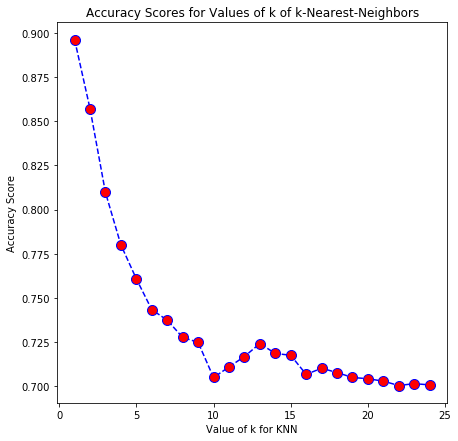

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = list(range(1,25))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train, y1_train)
    y1_pred = knn.predict(X1_test)
    scores.append(metrics.accuracy_score(y1_test, y1_pred))
    
plt.plot(k_range, scores,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [87]:

knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X1_train, y1_train)

# prediction = knn.predict(x_test)
normalized_data2_knn_pred = knn.predict(X1_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
accknn = accuracy_score(y1_test, normalized_data2_knn_pred)
print(f"The accuracy score for KNN is: {round(accknn,3)*100}%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1knn = f1_score(y1_test, normalized_data2_knn_pred)
print(f"The f1 score for KNN is: {round(f1knn,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionknn = precision_score(y1_test, normalized_data2_knn_pred)
print(f"The precision score for KNN is: {round(precisionknn,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recallknn = recall_score(y1_test, normalized_data2_knn_pred)
print(f"The recall score for KNN is: {round(recallknn,3)*100}%")

The accuracy score for KNN is: 85.7%
The f1 score for KNN is: 86.3%
The precision score for KNN is: 83.6%
The recall score for KNN is: 89.2%


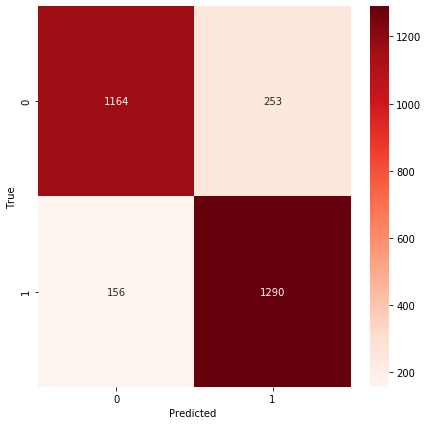

In [88]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y1_test, normalized_data2_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True');

<h4>5.Naive Bayesian Classification</h4>

In [89]:

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X1_train,y1_train)
pred_rand= model.predict(X1_test)
print("Accuracy of Naive Bayesian is:",metrics.accuracy_score(y1_test, pred_rand)*100,"%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1rf = f1_score(y1_test, pred_rand)
print(f"The f1 score for Naive Bayesian is: {round(f1rf,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionrf = precision_score(y1_test,pred_rand)
print(f"The precision score for Naive Bayesian is: {round(precisionrf,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recallrf = recall_score(y1_test, pred_rand)
print(f"The recall score for Naive Bayesian is: {round(recallrf,3)*100}%")

Accuracy of Naive Bayesian is: 63.25532658050995 %
The f1 score for Naive Bayesian is: 56.599999999999994%
The precision score for Naive Bayesian is: 70.1%
The recall score for Naive Bayesian is: 47.4%


<b>6.RANDOM FOREST</b>

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X1_test)
clf.fit(X1_train,y1_train)

pred_rand=clf.predict(X1_test)
print("Accuracy of Random Forest is:",metrics.accuracy_score(y1_test, pred_rand)*100)

Accuracy of Random Forest is: 94.34159972057282


In [91]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
accrand = accuracy_score(y1_test, pred_rand)
print(f"The accuracy score for Random Forest is: {round(accrand,3)*100}%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1rand = f1_score(y1_test, pred_rand)
print(f"The f1 score for Random Forest is: {round(f1rand,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionrand = precision_score(y1_test, pred_rand)
print(f"The precision score for Random Forest is: {round(precisionrand,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recallrand = recall_score(y1_test, pred_rand)
print(f"The recall score for Random Forest is: {round(recallrand,3)*100}%")

The accuracy score for Random Forest is: 94.3%
The f1 score for Random Forest is: 94.6%
The precision score for Random Forest is: 91.3%
The recall score for Random Forest is: 98.2%


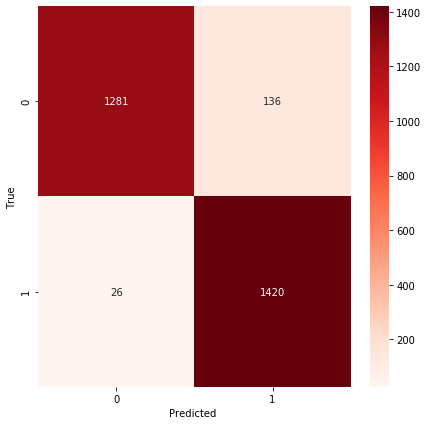

In [92]:
# plotting confusion matrix Random Forest

cnf_matrix_random = confusion_matrix(y1_test, pred_rand)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_random), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True');

<b>As random forest is giving highest accuracy and f1 we also check with cross validation mehord.</b>
<b>It is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set</b>

<h3>CROSS VALIDATION<h3>

In [93]:

cv_results = cross_val_score(clf, X1, y1, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.95600559 0.97274633 0.9650594  0.96645702 0.96016771]
The Accuracy of Model with Cross Validation is: 96.41%


<h4>From The cross validation result and the F1 score and accuracy of the models we conclude that Random Forest model is better because:<br></h4>
    
<p>It runs efficiently on large databases.<br>
2) It can handle thousands of input variables without variable deletion.<br>
3) It gives estimates of what variables are important in the classification<br>

Also<br>
    If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting which doesnot occur in Random Forest<br>
    
 Random forests are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.<br>
    
Random Forest is intrinsically suited for multiclass problems, while SVM is intrinsically two-class. For multiclass problem you will need to reduce it into multiple binary classification problems.<br>
    
We have to determine the value of parameter K (number of nearest neighbors) in KNN and the type of distance to be used. The computation time is also very much as we need to compute distance of each query insta
nce to all training samples which is not required in Random forest<br>
 
Main limitation of Naive Bayes is the assumption of independent predictor features. Naive Bayes implicitly assumes that all the attributes are mutually independent. In real life, it’s almost impossible that we get a set of predictors that are completely independent or one another .</p>